# Konten
* [Deskripsi Proyek]
* [Tahap 1 Import Module]
* [Tahap 2 Import Datasets]
* [Tahap 3 Memeriksa Datasets]
* [Tahap 4 Latihan dan Pengujian Model]
    * [4.1 Fungsi Standard Scaler]
    * [4.2 Wilayah 1]
    * [4.3 Wilayah 2]
    * [4.4 Wilayah 3]
    * [4.5 Analisis Hasil]
* [Tahap 5 Persiapan Menghitung Laba]
* [Tahap 6 Menghitung Laba]
* [Tahap 7 Menghitung Resiko dan Laba untuk Setiap Wilayah]

# Deskripsi Proyek
Pada proyek ini kita ditugaskan untuk menemukan lokasi yang cocok untuk penggalian sumur minyak baru. Adapun langkah-langkah untuk memilih lokasi baru adalah:
- Kumpulkan parameter untuk membangun sumur minyak di beberapa wilayah terpilih: kualitas minyak dan volume cadangan minyak;
- Buatlah sebuah model yang mampu memprediksi volume cadangan minyak di sumur yang baru;
- Pilihlah sumur minyak dengan nilai estimasi tertinggi;
- Pilihlah wilayah dengan total laba tertinggi untuk sumur minyak terpilih.

Data yang dipakai adalah data minyak dari tiga wilayah. Dari data tersebut, akan dibuat model yang akan membantu dalam pemilihan wilayah.

# Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Import Datasets

In [3]:
try:
    df1 = pd.read_csv('D:\datasets\projek_9\geo_data_0.csv')
    df2 = pd.read_csv('D:\datasets\projek_9\geo_data_1.csv')
    df3 = pd.read_csv('D:\datasets\projek_9\geo_data_2.csv')
except:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
    df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Berdasarkan informasi di atas data tersebut terdirir dari 4 kolom yaitu kolom:
- `id`: ID unik sumur minyak
- `f0`, `f1`, dan `f2`: tiga fitur titik (makna spesifiknya tidak penting, tetapi fitur itu sendiri signifikan)
- `product`:  volume cadangan minyak di sumur (ribuan barel).

# Memeriksa Dataset

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df1.duplicated().sum()

0

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
df2.duplicated().sum()

0

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
df3.duplicated().sum()

0

**Berdasarkan informasi di atas:**
- Untuk nilai pada setiap kolom di setiap dataset tidak ada yang hilang. Semua memiliki jumlah baris yang sama yaitu sebanyak **10.000**.
- Untuk tipe datanya, setiap kolom memiliki tipe data yang sesuai.
- Tidak ada nilai yang hilang untuk setiap dataset. Jadi, kita bisa langsung melakukan analisis lebih lanjut untuk data ini.

In [13]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [14]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [15]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Berdasarkan informasi di atas:**
- Berdasarkan nilai rata-rata produk, nilai df3 memiliki nilai yang lebih tinggi dan nilai yang lebih rendah adalah df2.
- Berdasarkan standard deviasi, untuk df1 dan df3 memiliki standard deviasi yang jauh dari nilai mean. Yang artinya, data yang ada itu kurang variatif. 
- Beda dengan nilai standard deviasi yang ada pada df2 di mana nilai-nya tidak terlalu jauh dengan nilai mean. Sehingga data produk yang ada pada df2 itu lebih variatif. Yang bisa kita simpulkan sementara bahwa data tersebut bagus karena banyak nilai yang variatif dibadung df1 dan df3.

In [16]:
df1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [17]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [18]:
df3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


**Berdasarkan informasi di atas:**
Sebenarnya kebanyakan tidak ada korelasi dengan semua fitur yang ada. Tetapi untuk df2, pada kolom `f2` itu memiliki korelasi yang tinggi dengan kolom `product`. 

In [19]:
columns = ['f0', 'f1', 'f2', 'product']
titles = ['f0', 'f1', 'f2', 'product']
def plot_hist(data):
    data.hist(column=columns, figsize=(10,10))

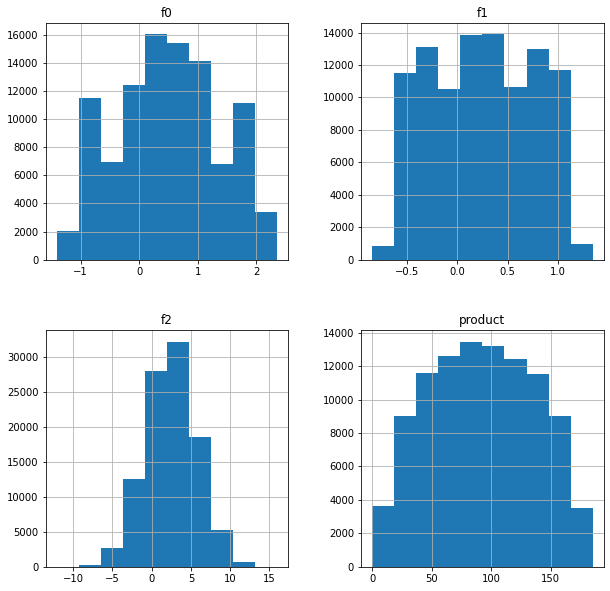

In [20]:
plot_hist(df1)

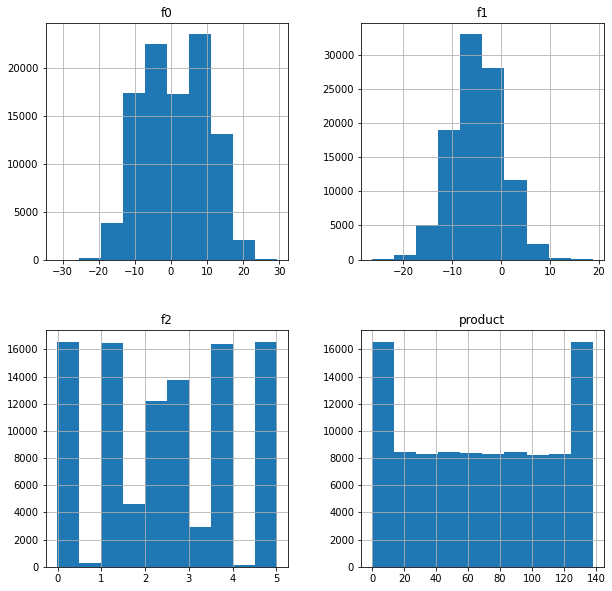

In [21]:
plot_hist(df2)

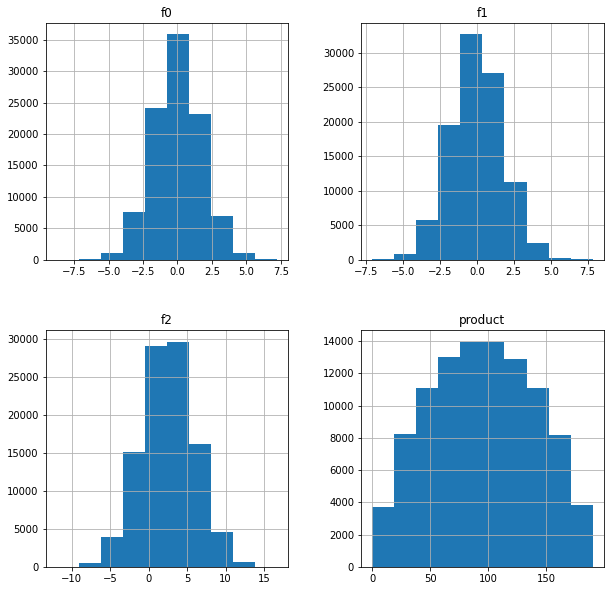

In [22]:
plot_hist(df3)

**Berdasarkan informasi di atas:** Dari data-data tersebut, terdapat banyak outlier di kolom `f0`, `f1`, `f2`. Namun, data-data tersebut tidak bisa dihilangkan karena itu merupakan titik-titik dari fitur sumur. Pada kolom `product` kelihatan tidak ada oulier.

<AxesSubplot:>

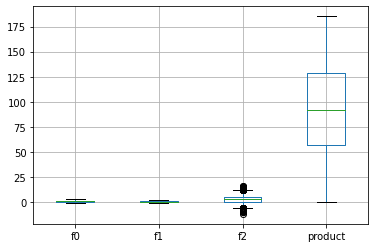

In [23]:
df1.boxplot()

<AxesSubplot:>

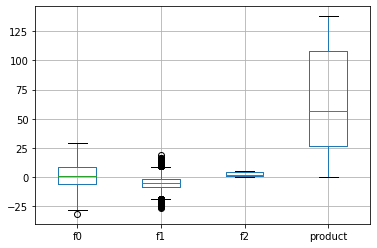

In [24]:
df2.boxplot()

<AxesSubplot:>

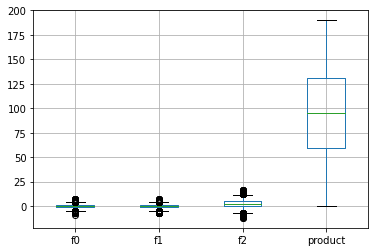

In [25]:
df3.boxplot()

**Berdasarkan informasi di atas:** Seperti yang kita ketahui banyak terjadi outlier di ketiga kolom `f0`, `f1`, dan `f2` memiliki banyak outlier. Akan tetapi, karena ini merupakan data fitur titi sumur maka tidak bisa dihilangkan.

# Latihan dan Pengujian Model

In [26]:
# membuat inisial untuk model
model = LinearRegression()

## Fungsi Standard Scaler

In [27]:
# fungsi untuk menerapkan standard scaler pada fitur numerik
def standard_scaler(features_train, features_valid):
    scaler = StandardScaler()
    numeric = ['f0','f1','f2'] # tabel numerik
    scaler.fit(features_train[numeric]) 
    features_train[numeric] = scaler.transform(features_train[numeric]) # merubah tabel numerik dengan standard scaler
    features_valid[numeric] = scaler.transform(features_valid[numeric]) # merubah tabel numerik dengan standard scaler

Fungsi ini bertujuan untuk menerapkan standard scaler pada kolom numerik yaitu menstandarisasi fitur dengan menghapus rata-rata dan menskalakan unit varian. Daripada mengulang codingan yang sama, makanya kita membuat fungsi ini.

## Wilayah 1

In [28]:
# Membuat fitur dengan menghapus kolom id dan product
df1_features = df1.drop(['id', 'product'], axis=1)

In [29]:
# Membuat target dengan mengambil kolom product
df1_target = df1['product']

In [30]:
# Memisahkan data menjadi train dan valid dengan rasio 75:25
df1_features_train, df1_features_valid, df1_target_train, df1_target_valid = train_test_split(df1_features, df1_target, test_size=0.25, random_state=12345)

In [31]:
standard_scaler(df1_features_train, df1_features_valid)

/tmp/ipykernel_27/885575800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]) # merubah tabel numerik dengan standard scaler
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [32]:
df1_features_train.head()

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


In [33]:
df1_features_valid.head()

,f0,f1,f2
71751,0.517917,-0.610097,-0.126226
80493,0.568391,-0.086063,-0.814914
2655,0.805688,-1.613289,-1.341342
53233,0.222503,-1.355437,-0.597275
91141,-0.087941,1.433113,-0.544588


Hasil dari standard scaler membuat jarak nilai data numerik menjadi tidak jauh.

In [34]:
# melatih model
model.fit(df1_features_train, df1_target_train)

LinearRegression()

In [35]:
# prediksi model menggunakan data valid
df1_predictions_valid = model.predict(df1_features_valid)

In [36]:
# menghitung MSE
mse_geo1 = mean_squared_error(df1_target_valid, df1_predictions_valid)

In [37]:
# menghitung rata-rata dan RMSE
print('Rata-rata:', df1_predictions_valid.mean())
print('RMSE:', mse_geo1**0.5)

Rata-rata: 92.59256778438035
RMSE: 37.5794217150813


## Wilayah 2

In [38]:
# Membuat fitur dengan menghapus kolom id dan product
df2_features = df2.drop(['id', 'product'], axis=1)

In [39]:
# Membuat target dengan mengambil kolom product
df2_target = df2['product']

In [40]:
# Memisahkan data menjadi train dan valid dengan rasio 75:25
df2_features_train, df2_features_valid, df2_target_train, df2_target_valid = train_test_split(df2_features, df2_target, test_size=0.25, random_state=12345)

In [41]:
standard_scaler(df2_features_train, df2_features_valid)

/tmp/ipykernel_27/885575800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]) # merubah tabel numerik dengan standard scaler
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [42]:
df2_features_train.head()

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


In [43]:
df2_features_valid.head()

,f0,f1,f2
71751,-0.168616,0.571372,0.297471
80493,0.878384,-1.772903,-0.293901
2655,-0.852976,-0.004986,-0.876502
53233,1.496940,-1.146077,-0.294011
91141,0.552177,0.057961,-1.457764


Hasil dari standard scaler membuat jarak nilai data numerik menjadi tidak jauh.

In [44]:
# melatih model
model.fit(df2_features_train, df2_target_train)

LinearRegression()

In [45]:
# prediksi target menggunakan data valid
df2_predictions_valid = model.predict(df2_features_valid)

In [46]:
# menghitung MSE
mse_geo2 = mean_squared_error(df2_target_valid, df2_predictions_valid)

In [47]:
# menghitung rata-rata dan RMSE
print('Rata-rata:', df2_predictions_valid.mean())
print('RMSE:', mse_geo2**0.5)

Rata-rata: 68.728546895446
RMSE: 0.893099286775617


## Wilayah 3

In [48]:
# Membuat fitur dengan menghapus kolom id dan product
df3_features = df3.drop(['id', 'product'], axis=1)

In [49]:
# Membuat target dengan mengambil kolom product
df3_target = df3['product']

In [50]:
# Memisahkan data menjadi train dan valid dengan rasio 75:25
df3_features_train, df3_features_valid, df3_target_train, df3_target_valid = train_test_split(df3_features, df3_target, test_size=0.25, random_state=42)

In [51]:
standard_scaler(df3_features_train, df3_features_valid)

/tmp/ipykernel_27/885575800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]) # merubah tabel numerik dengan standard scaler
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [52]:
df3_features_train.head()

,f0,f1,f2
98980,-0.343864,-1.338311,0.817572
69824,-0.400431,0.993613,-1.102974
9928,1.004849,-0.923485,-0.576264
75599,-0.784031,0.571573,0.914886
95621,0.619771,0.681588,-0.429467


In [53]:
df3_features_valid.head()

,f0,f1,f2
75721,1.218275,-0.966868,0.175298
80184,0.423146,0.434841,0.336007
19864,-1.453162,0.490760,-2.136247
76699,-1.177130,-0.876338,0.739322
92991,1.583978,0.828733,-1.114918


Hasil dari standard scaler membuat jarak nilai data numerik menjadi tidak jauh.

In [54]:
# melatih model menggunakan train set
model.fit(df3_features_train, df3_target_train)

LinearRegression()

In [55]:
# prediksi target menggunakan valid set
df3_predictions_valid = model.predict(df3_features_valid)

In [56]:
# menghitung MSE
mse_geo3 = mean_squared_error(df3_target_valid, df3_predictions_valid)

In [57]:
# menghitung rata-rata dan RMSE
print('Rata-rata:', df3_predictions_valid.mean())
print('RMSE:', mse_geo3**0.5)

Rata-rata: 94.77102387765939
RMSE: 40.145872311342174


## Bandingkan Hasil

### Wilayah 1

In [62]:
# membuat series dan menjadikannya DataFrame
df1_predicted_value = pd.Series(df1_predictions_valid)
df1_real_value = pd.Series(df1_target_valid)

In [69]:
df1_predicted_value = pd.DataFrame(df1_predicted_value).rename(columns={0:'predicted_value'}).reset_index(drop=True)
df1_real_value = pd.DataFrame(df1_real_value).rename(columns={'product':'real_value'}).reset_index(drop=True)

In [71]:
# menggabungkan dua data frame dan membandingkan hasil
df1_predicted_value.join(df1_real_value)

,predicted_value,real_value
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180
...,...,...
24995,103.037104,170.116726
24996,85.403255,93.632175
24997,61.509833,127.352259
24998,118.180397,99.782700


### Wilayah 2

In [72]:
# membuat series dan menjadikannya DataFrame
df2_predicted_value = pd.Series(df2_predictions_valid)
df2_real_value = pd.Series(df2_target_valid)

In [73]:
df2_predicted_value = pd.DataFrame(df2_predicted_value).rename(columns={0:'predicted_value'}).reset_index(drop=True)
df2_real_value = pd.DataFrame(df2_real_value).rename(columns={'product':'real_value'}).reset_index(drop=True)

In [74]:
# menggabungkan dua data frame dan membandingkan hasil
df2_predicted_value.join(df2_real_value)

,predicted_value,real_value
0,82.663314,80.859783
1,54.431786,53.906522
2,29.748760,30.132364
3,53.552133,53.906522
4,1.243856,0.000000
...,...,...
24995,136.869211,137.945408
24996,110.693465,110.992147
24997,137.879341,137.945408
24998,83.761966,84.038886


### Wilayah 3

In [75]:
# membuat series dan menjadikannya DataFrame
df3_predicted_value = pd.Series(df3_predictions_valid)
df3_real_value = pd.Series(df3_target_valid)

In [76]:
df3_predicted_value = pd.DataFrame(df3_predicted_value).rename(columns={0:'predicted_value'}).reset_index(drop=True)
df3_real_value = pd.DataFrame(df3_real_value).rename(columns={'product':'real_value'}).reset_index(drop=True)

In [77]:
# menggabungkan dua data frame dan membandingkan hasil
df3_predicted_value.join(df3_real_value)

,predicted_value,real_value
0,98.301916,117.441301
1,101.592461,47.841249
2,52.449099,45.883483
3,109.922127,139.014608
4,72.411847,84.004276
...,...,...
24995,102.764169,40.797226
24996,93.431823,87.144239
24997,64.098390,52.039812
24998,83.764135,136.961454


## Analisis Hasil
Berdasarkan hasil di atas, bisa disimpulkan bahwa:
- Pada wilayah satu, rata-rata cadangan volume minyak yang didapat adalah **92**. Dengan nilai RMSE **37.5**.
- Pada wilayah dua, rata-rata cadangan volume minyak yang didapat adalah **68**. Dengan nilai RMSE **0.89**.
- Pada wilayah tiga, rata-rata cadangan volume minyak yang didapat adalah **94**. Dengan nilai RMSE **40.14**.

Berdasarkan pemaparan di atas, bisa kita lihat bahwa wilayah yang memiliki volume cadangan minyak paling banyak adalah wilayah 3. Sedangkan untuk nilai **RMSE** yang paling rendah adalah di wilayah 2 yang menunjukkan bahwa model yang diprediksi lebih akurat menggunakan data wilayah 2.

Pada saat membandingkan **predicted_value** dan **real_value** hasilnya untuk wilayah 1 dan 3 itu jauh sedangkan untuk wilayah 2 hasilnya hampir sama akurat. Hal ini bisa dilihat juga dari tingkat RMSE yang mana semakin rendah nilainya maka tingkat akurasi dalam memprediksi semakin bagus.

# Persiapan Menghitung Laba

Sisa volume minyak yang tersedia:

In [111]:
chosen_points = 200
budget_200 = 100000000
income_per_volume = 4500
volume_min = budget_200/income_per_volume
each_wells_volume = volume_min/chosen_points

In [112]:
print('Minimum volume:', volume_min)
print('Setiap sumur harus mempunyai volume:', each_wells_volume)

Minimum volume: 22222.222222222223
Setiap sumur harus mempunyai volume: 111.11111111111111


Rata-rata cadangan minyak yang tersedia:

In [80]:
df1['product'].mean()

92.50000000000001

In [81]:
df2['product'].mean()

68.82500000000002

In [82]:
df3['product'].mean()

95.00000000000004

**Berdasarkan informasi di atas:** Minimul volume yang harus diisi untuk setiap sumur di 200 titik adalah sebesar **111**. Sedangkan rata-rata volume yang dihasilkan setiap wilayah tidak mencapai minimum volume yang dibutuhkan setiap sumur

# Menghitung Laba

In [83]:
def profit(target, predictions):
    sorted_probs = predictions.sort_values(ascending=False)
    select_points = target[sorted_probs.index][:200]
    revenue = income_per_volume*select_points.sum()
    return round(revenue - budget_200, 2)

Mereset index data valid:

In [84]:
df1_target_valid = df1_target_valid.reset_index(drop=True)
df2_target_valid = df2_target_valid.reset_index(drop=True)
df3_target_valid = df3_target_valid.reset_index(drop=True)

Merubah data prediksi menjadi series:

In [85]:
df1_predictions_valid = pd.Series(df1_predictions_valid)
df2_predictions_valid = pd.Series(df2_predictions_valid)
df3_predictions_valid = pd.Series(df3_predictions_valid)

In [86]:
print("Total profit yang didapat wilayah 1 adalah: {} USD".format(profit(df1_target_valid, df1_predictions_valid)))
print("Total profit yang didapat wilayah 2 adalah: {} USD".format(profit(df2_target_valid, df2_predictions_valid)))
print("Total profit yang didapat wilayah 3 adalah: {} USD".format(profit(df3_target_valid, df3_predictions_valid)))

Total profit yang didapat wilayah 1 adalah: 33208260.43 USD
Total profit yang didapat wilayah 2 adalah: 24150866.97 USD
Total profit yang didapat wilayah 3 adalah: 25985717.59 USD


Berdasarkan informasi yang didapat, profit yang lebih besar didapatkan ada pada wilayah 1. Dengan profit mencapai **33.208.260** USD. Namun, tidak semua titik di wilayah tersebut menghasilkan profit yang demikian. Maka dari itu, akan dilakukan bootstrapping pada interval kepercayaan 95% dengan jumlah sample adalah 1.000.

# Menghitung Resiko dan Laba untuk Setiap Wilayah

In [113]:
state = np.random.RandomState(12345) # nilai random state

# membuat fungsi untuk menghitung nilai resiko dan untung
def risk_and_profit(target, predictions): 
    target = target.reset_index(drop=True)
    values = [] # list kosong untuk nilai profit
    # loss = 0 # jumlah kerugian yang terjadi
    
    # looping 1000 sample dari data valid 
    for i in range(1000):
        predictions_subsample = predictions.sample(n=500, replace=True, random_state=state) # mengambil subsample 500 
        # karena titik observasi sebanyak 500
        target_subsample = target[predictions_subsample.index] # mengambil subsample pada target
        profits = profit(target_subsample, predictions_subsample) # menghitung profit menggunakan fungsi yang sudah di buat
        values.append(profits) # menambhakan nilai profits pada sebuah list
        # if profits < 0:
            # loss += 1 # berapa banyak kerugian yang terjadi
    values = pd.Series(values)
    average = values.mean()
    loss = values[values < 0]
    
    # mencari selang kepercayaan
    lower = values.quantile(0.025) # quantile lower pada values
    upper = values.quantile(0.975) # quantile upper pada values
    # risk_of_loss = loss/1000 # menghitung kerugian dalam bentuk persentase
    risk_of_loss = loss.sum()/1000 # menghitung kerugian dalam bentuk USD
    
    print("Rata-rata Pendapatan: {} USD".format(average))
    print("Interval Kepercayaan: ({}, {})".format(lower, upper))
    print("Resiko Kerugian Sebesar: {}".format(risk_of_loss))

In [105]:
print("Wilayah 1")
risk_and_profit(df1_target_valid, df1_predictions_valid)

Wilayah 1
Rata-rata Pendapatan: 4259385.26927 USD
Interval Kepercayaan: (-1020900.94925, 9479763.535749998)
Resiko Kerugian Sebesar: -68948.89772


In [106]:
print("Wilayah 2")
risk_and_profit(df2_target_valid, df2_predictions_valid)

Wilayah 2
Rata-rata Pendapatan: 5182594.936989999 USD
Interval Kepercayaan: (1281232.31, 9536129.819)
Resiko Kerugian Sebesar: -1472.5228


In [107]:
print("Wilayah 3")
risk_and_profit(df3_target_valid, df3_predictions_valid)

Wilayah 3
Rata-rata Pendapatan: 4126728.9898100006 USD
Interval Kepercayaan: (-1589395.15525, 9781912.0215)
Resiko Kerugian Sebesar: -93122.13161


Berdasarkan informasi di atas, wilayah yang memiliki rata-rata pendapatan paling banyak adalah wilayah 2. Dengan resiko kerugian sebesar **-1472.5228**. Sangat kecil jika dibandingkan dengan 2 wilayah yang lain. Untuk wilayah 1 dan 3 tidak direkomendasikan karena terdapat resiko kerugian yang begitu signifikan. Berdasarkan hal ini, wilayah 2 aman untuk dijadikan tempat galian sumur.

# Kesimpulan Umum
- Model yang dipakai untuk memprediksi adalah model Linear Regression.
- Semua data yang dipakai adalah data numerik yang di mana tidak memiliki nilai yang hilang, nilai duplikat, dan kesalahan dalam tipe data.
- Data memiliki outlier yang tidak perlu dihapus karena itu merupakan bagian data dalam memprediksi.
- Nilai RMSE yang terendah adalah wilayah 2. Hal ini juga ditunjukkan dengan hasil prediksi yang hampir benar semua ketika diuji.
- Minimal volume yang harus ada pada sumur senilai 111. Akan tetapi, rata-rata volume di setiap wilayah tidak mencapai target minimum volume.
- Total profit tertinggi jatuh pada wilayah 1. Dengan nilai profit sebesar 33.208.260 USD.
- Dengan menggunakan selang keper